Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.0

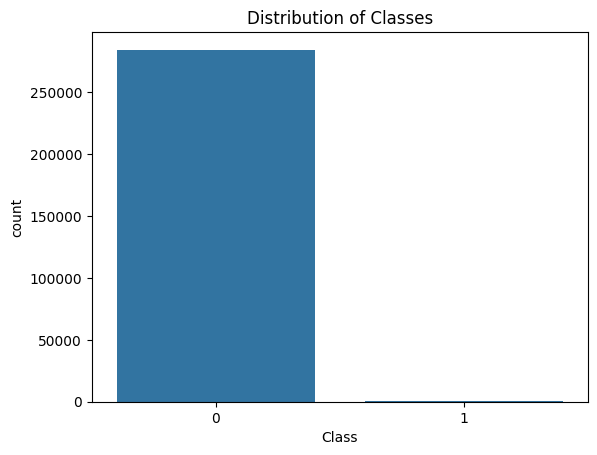

Duplicate Rows:             Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7       

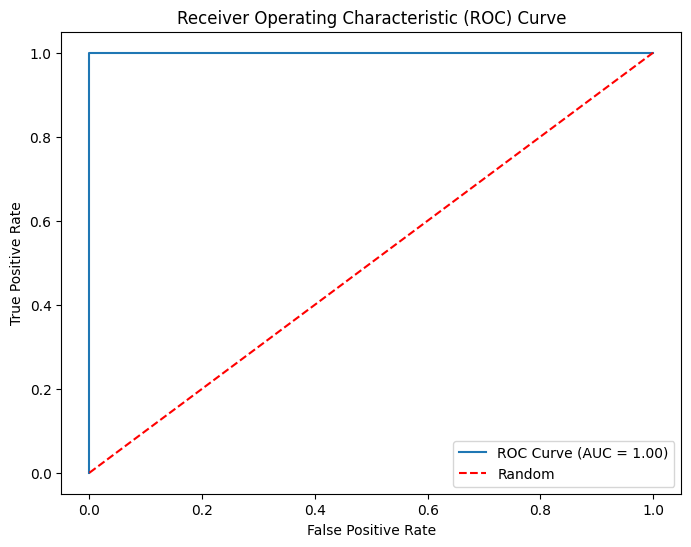


Logistic Regression:
AUC: 0.9868753290941028
Accuracy: 0.9487188505706698

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


Confusion Matrix (Test Data):
 [[55507  1356]
 [ 4476 52387]]

Precision: 0.9747688071004595
Recall: 0.9212844907936619
F1 Score: 0.9472722998752328


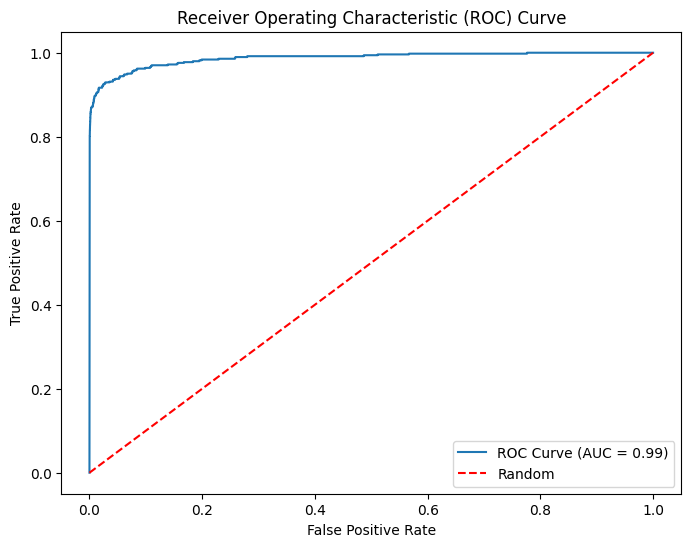


XGBoost:
AUC: 0.9999951701007342
Accuracy: 0.9999208624237201

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix (Test Data):
 [[56854     9]
 [    0 56863]]

Precision: 0.9998417498944999
Recall: 1.0
F1 Score: 0.9999208686859806


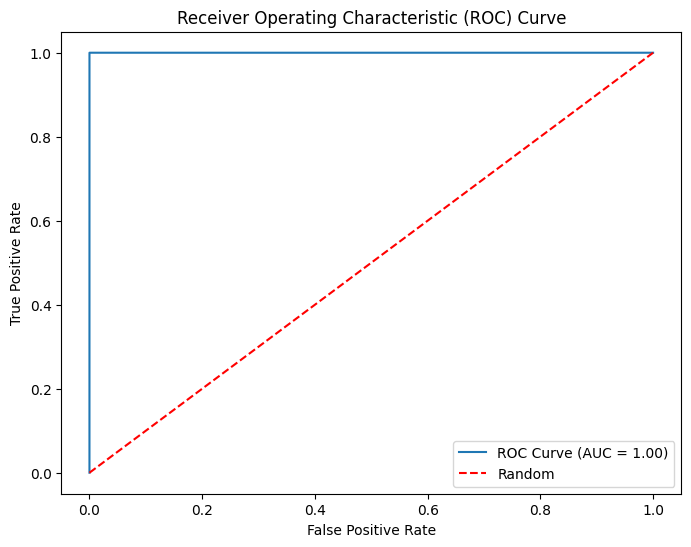

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Data Cleaning
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# No missing values found, so no imputation needed

# Data Exploration
print(df.head())  # Display first few rows
print(df.info())  # Overview of columns and data types
print(df.describe())  # Statistical summary of numerical columns
print(df['Class'].value_counts())  # Distribution of target variable

# Distribution of fraudulent and non-fraudulent transactions
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.show()

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:", duplicate_rows)

# No duplicate rows found, so no dropping needed

# Data Preprocessing
# No categorical variables, so no encoding needed

# Feature Scaling
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)  # Drop original Time and Amount columns

# Handling Class Imbalance
fraudulent = df[df['Class'] == 1]
non_fraudulent = df[df['Class'] == 0]

# Oversampling
oversampled_fraudulent = fraudulent.sample(n=len(non_fraudulent), replace=True, random_state=42)
df_balanced = pd.concat([non_fraudulent, oversampled_fraudulent])

# Train/Test Split
X = df_balanced.drop('Class', axis=1)  # Features
y = df_balanced['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building (Random Forest Classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model Building (Logistic Regression)
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)

# Model Building (XGBoost)
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print("AUC:", auc)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred))
    
    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("\nPrecision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

print("Random Forest Classifier:")
evaluate_model(rf_classifier, X_test, y_test)

print("\nLogistic Regression:")
evaluate_model(logreg_classifier, X_test, y_test)

print("\nXGBoost:")
evaluate_model(xgb_classifier, X_test, y_test)